![Tunisian Property Market](market.jpg)

<h1 style="font-family: Comic Sans MS; background-color:#AED6F1; padding: 10px; border-radius: 10px;">🏠 About This Kernel</h1>

In this notebook, we analyze the **Tunisian property market** using various data science techniques. The objective is to **understand real estate price patterns**, identify influencing factors, and explore trends in property values across different regions of Tunisia.

Rather than directly jumping into predictive modeling, we will first **explore the data deeply**, uncovering relationships between location, property size, price, and other features. Then we’ll proceed through **EDA, feature engineering, model training**, and **evaluation** using modern machine learning methods. 📈

---

While many notebooks focus on fitting models quickly, our goal here is to **gain insights into what drives property prices** in Tunisia. This helps us design smarter features and models that generalize better across diverse locations.

---

<h1 style="font-family: Comic Sans MS; background-color:#A3E4D7; padding: 10px; border-radius: 10px;">📚 Real Estate Market Context</h1>

> ### ❓ Why analyze property prices in Tunisia?

Understanding real estate trends is vital for:

- **Investors** seeking profitable opportunities 💼
- **Homebuyers** making informed decisions 🏡
- **Urban planners and policy makers** designing affordable housing policies 🏙️

📌 Did you know?
- Property prices vary **significantly between coastal cities and inland regions**.
- Features like **surface area, number of rooms, and proximity to amenities** heavily influence property value.
- Real estate is a key component of Tunisia’s **economic and social development**.

---

> ### 💡 What kind of data are we analyzing?

The dataset contains information such as:
- **Location (region, city)**
- **Surface area and number of rooms**
- **Price, price per m²**
- **Property type (apartment, villa, land, etc.)**

We'll also create useful derived features such as:
- **Price per square meter**
- **Price category segments**
- **Regional averages and deviations**

These features help reveal underlying trends and market behaviors. 🧠

---

<h1 style="font-family: Comic Sans MS; background-color:#F9E79F; padding: 10px; border-radius: 10px;">🔍 Initial Understanding of the Data</h1>

In the next sections, we’ll:

- Load and examine the **dataset structure**
- Clean the data by handling missing or inconsistent values
- Visualize **price distributions**, **regional comparisons**, and **feature interactions**
- Analyze correlations using **heatmaps, box plots**, and **geographical charts**
- Train machine learning models to predict:
  - **Property price**
  - **Price category** (e.g., low, medium, high)
- Evaluate the models with metrics such as **MAE, RMSE, and R² score**
- Explore **feature importance** and **model explainability**

Let’s dive into the Tunisian real estate market and uncover its secrets! 🇹🇳📊


In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import joblib


*1. Loading the data*

*2. Checking the head of the data*

*3. Looking out for the null values*

In [371]:
df = pd.read_csv('Property Prices in Tunisia.csv')

In [372]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


<h3 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">📋 Understanding the Columns</h3>

Below are the columns from the dataset along with a short description of what each represents:

- **category** — The market category of the property (e.g., "For Sale", "For Rent").
- **room_count** — Number of rooms in the property.
- **bathroom_count** — Number of bathrooms available.
- **size** — Total surface area of the property in square meters.
- **type** — Type of property (e.g., apartment, villa, land).
- **price** — Listed price of the property (in local currency).
- **city** — The city in which the property is located.
- **region** — The broader region or governorate of Tunisia the city belongs to.
- **log_price** — Log-transformed price, used to normalize price distribution for modeling and visualization.

🧠 These features allow us to analyze trends in pricing, assess housing availability by region, and build predictive models for estimating property value.


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB


<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">🔍 Important Inferences:</h4>

* There are a total of **9** columns in the dataset.
* Out of these, **5 columns are numerical** (`room_count`, `bathroom_count`, `size`, `price`, `log_price`) and **4 are categorical** (`category`, `type`, `city`, `region`).
* The dataset contains **12,748 entries**, which provides a solid base for statistical analysis and machine learning models.
* The `log_price` column is a log-transformed version of the original `price`, which helps reduce skewness and improves model performance.


In [374]:
print(df['city'].value_counts())
print("\n \n")


city
Tunis          2408
Ariana         2374
Sousse         2270
Ben arous      1123
Nabeul          821
La manouba      663
Sfax            646
Monastir        479
Bizerte         455
Mahdia          268
Médenine        230
Gabès           191
Zaghouan        181
Kairouan        116
Jendouba         92
Gafsa            88
Béja             63
Le kef           63
Kasserine        59
Sidi bouzid      53
Tozeur           46
Siliana          31
Tataouine        17
Kébili           11
Name: count, dtype: int64

 



<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">🔍 Important Inferences:</h4>

* The dataset contains property listings from **24 cities** across Tunisia.
* The majority of the listings come from major urban centers such as **Tunis (2408)**, **Ariana (2374)**, and **Sousse (2270)** — making up a significant portion of the data.
* Cities like **Tataouine (17)** and **Kébili (11)** have very few listings, which may not provide strong statistical value on their own.
* We will retain the `city` column since it plays an important role in regional price trends and urban density analysis.
* If necessary, less-represented cities can be grouped under an "Other" category for modeling purposes to avoid high cardinality issues.

> Now let us move to clean the data


<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Data Preparation & Performing Feature Engineering </h1>

Before diving into modeling, it is crucial to clean the dataset to ensure accuracy and consistency. In this step, we will handle missing values, remove any duplicate records, and ensure that data types are properly formatted. We'll also inspect for outliers or unrealistic values (e.g., extremely high prices or room counts) and standardize categorical values where necessary. This process helps improve the quality of our features and enhances model performance.


In [375]:
# Print initial DataFrame info
print("Initial Size:", df.size)
print("Initial Shape:", df.shape)
print("\nInitial DataFrame Info:")
print(df.info())

Initial Size: 114732
Initial Shape: (12748, 9)

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB
None


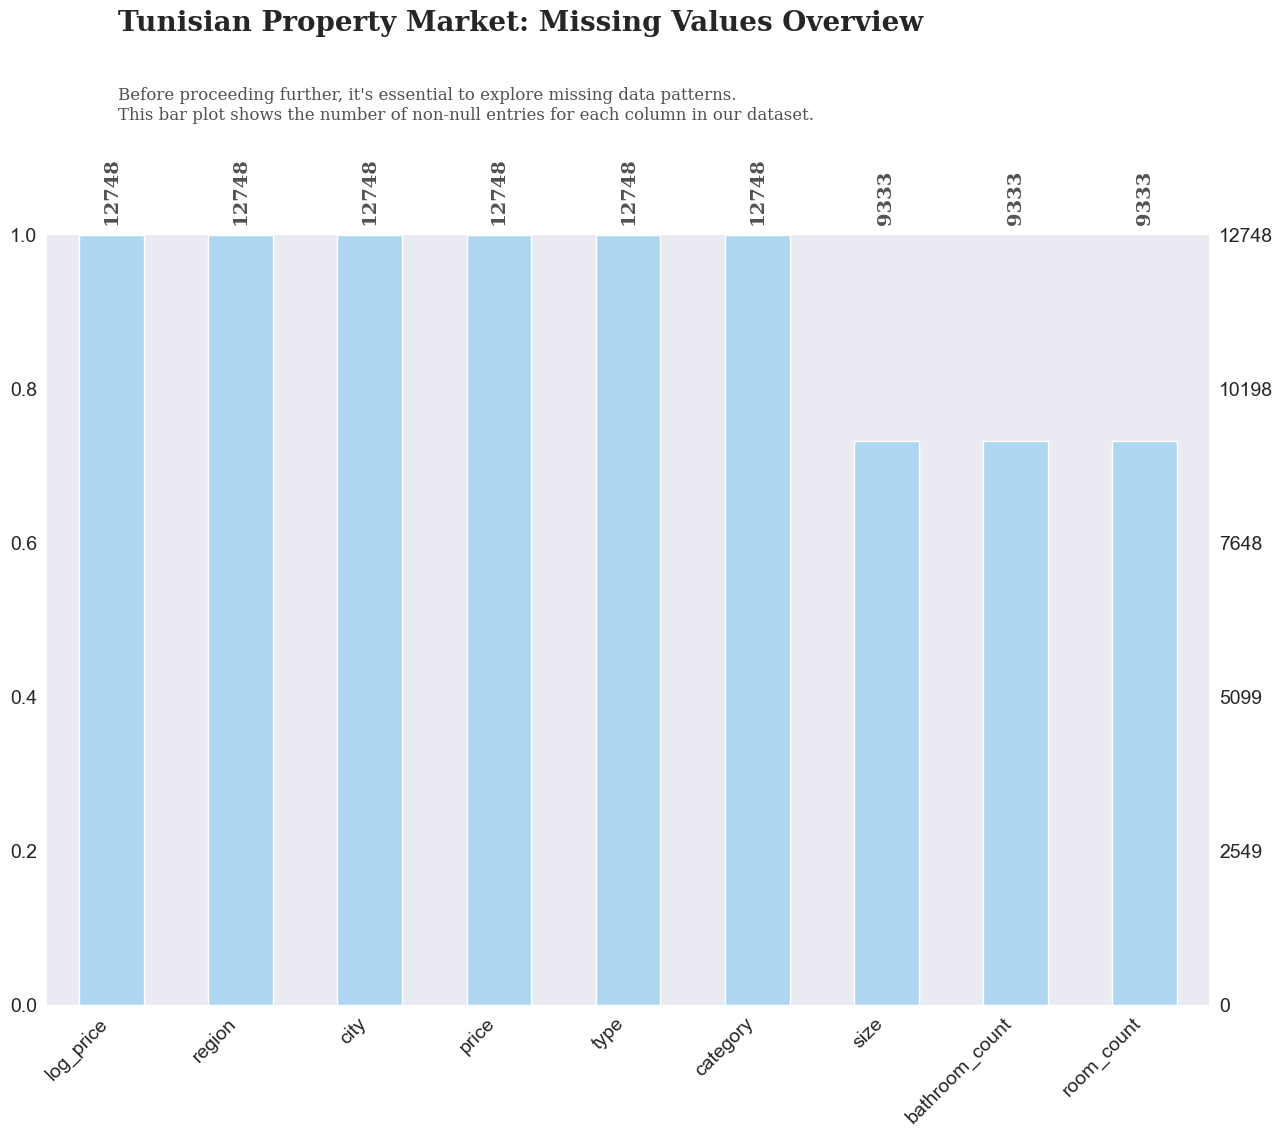

In [376]:
df.replace(-1, np.nan, inplace=True)
sns.set_style('dark')
color = ['#AED6F1'] * df.shape[1]
msno.bar(df, fontsize=14, color=color, sort='descending', figsize=(15, 10))
plt.text(0.05, 1.265, 'Tunisian Property Market: Missing Values Overview',
         {'font': 'serif', 'size': 20, 'weight': 'bold'})
plt.text(0.05, 1.15,
         '''Before proceeding further, it's essential to explore missing data patterns.
This bar plot shows the number of non-null entries for each column in our dataset.''',
         {'font': 'serif', 'size': 12, 'weight': 'normal'}, alpha=0.8)

plt.xticks(rotation=90,
           **{'font': 'serif', 'size': 14, 'weight': 'bold', 'horizontalalignment': 'center'}, alpha=0.8)
plt.show()

In [377]:
# 1. Standardize category names
df['category'] = df['category'].replace({
    "Magasins, Commerces et Locaux industriels": "Locaux industriels",
    "Maisons et Villas": "Villas",
    "Locations de vacances": "Vacation Rentals",
    "Bureaux et Plateaux": "Offices",
    "Colocations": "Shared Housing"
})

In [378]:
# 2. Remove 'Terrains et Fermes' entries
df = df[df['category'] != 'Terrains et Fermes']

# 3. Replace -1 with NaN for numerical columns
numerical_cols = ['room_count', 'bathroom_count', 'size']
df[numerical_cols] = df[numerical_cols].replace(-1, np.nan)

# 4. Handle missing values
# Drop rows where price is missing (critical for analysis)
df.dropna(subset=['price'], inplace=True)

# Fill missing size with median size per category to preserve data
df['size'] = df.groupby('category')['size'].transform(lambda x: x.fillna(x.median()))

# Fill missing room_count and bathroom_count with 0 for non-residential properties
non_residential = ['Locaux industriels', 'Offices']
df.loc[df['category'].isin(non_residential), ['room_count', 'bathroom_count']] = df.loc[
    df['category'].isin(non_residential), ['room_count', 'bathroom_count']
].fillna(0)

# For residential properties, fill with median per category
residential = ['Appartements', 'Villas', 'Vacation Rentals', 'Shared Housing']
df.loc[df['category'].isin(residential), 'room_count'] = df.loc[
    df['category'].isin(residential), 'room_count'
].fillna(df.loc[df['category'].isin(residential), 'room_count'].median())
df.loc[df['category'].isin(residential), 'bathroom_count'] = df.loc[
    df['category'].isin(residential), 'bathroom_count'
].fillna(df.loc[df['category'].isin(residential), 'bathroom_count'].median())

# 5. Convert to appropriate data types
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df['room_count'] = pd.to_numeric(df['room_count'], errors='coerce').fillna(0).astype(int)
df['bathroom_count'] = pd.to_numeric(df['bathroom_count'], errors='coerce').fillna(0).astype(int)
df['type'] = df['type'].astype('category')
df['category'] = df['category'].astype('category')
df['city'] = df['city'].astype('category')
df['region'] = df['region'].astype('category')

# 6. Remove outliers (e.g., extreme prices or sizes)
# Define reasonable thresholds (adjust based on domain knowledge)
price_threshold = df['price'].quantile(0.99)  # Remove top 1% of prices
size_threshold = df['size'].quantile(0.99)    # Remove top 1% of sizes
df = df[(df['price'] <= price_threshold) & (df['size'] <= size_threshold)]

# 7. Validate data consistency
# Ensure price and size are positive
df = df[(df['price'] > 0) & (df['size'] > 0)]

# Recalculate log_price for consistency
df['log_price'] = np.log10(df['price'].clip(lower=1))  # Avoid log(0)

# Supprimer les lignes avec prix nul ou négatif
df = df[df['price'] > 100]

# Supprimer les valeurs aberrantes sur le prix
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

In [379]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,Appartements,2,1,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
4,Appartements,2,2,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
6,Appartements,2,1,100.0,À Louer,670.0,Ariana,Borj Louzir,2.826075
7,Locaux industriels,2,1,20.0,À Louer,650.0,Ariana,Borj Louzir,2.812913
9,Locaux industriels,1,1,40.0,À Louer,450.0,Ariana,Ariana Ville,2.653213


> Now let us move forward and perform EDA

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Exploratory Data Analysis </h1>



![Alt_Text](https://miro.medium.com/max/615/1*Nr8BJzXWodgpDZl-54abrQ.jpeg)

Before beginning the EDA, it's important to understand the context behind the dataset we are working with.

* This dataset contains **property listings from various cities across Tunisia**, capturing information about real estate such as number of rooms, bathrooms, size, type of property, price, and region.
* The data has been collected from public or platform-based real estate sources and provides insights into the **Tunisian real estate market**, particularly for cities like Tunis, Ariana, Sousse, and others.
* Through this analysis, we aim to uncover patterns in housing prices, understand how features like size or location affect value, and ultimately build models that can help **predict property prices** or support **buyers and investors** in making data-driven decisions.


> Let us begin by understanding the target data!

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;">  Most popular category for real estate in Tunisia </h1>


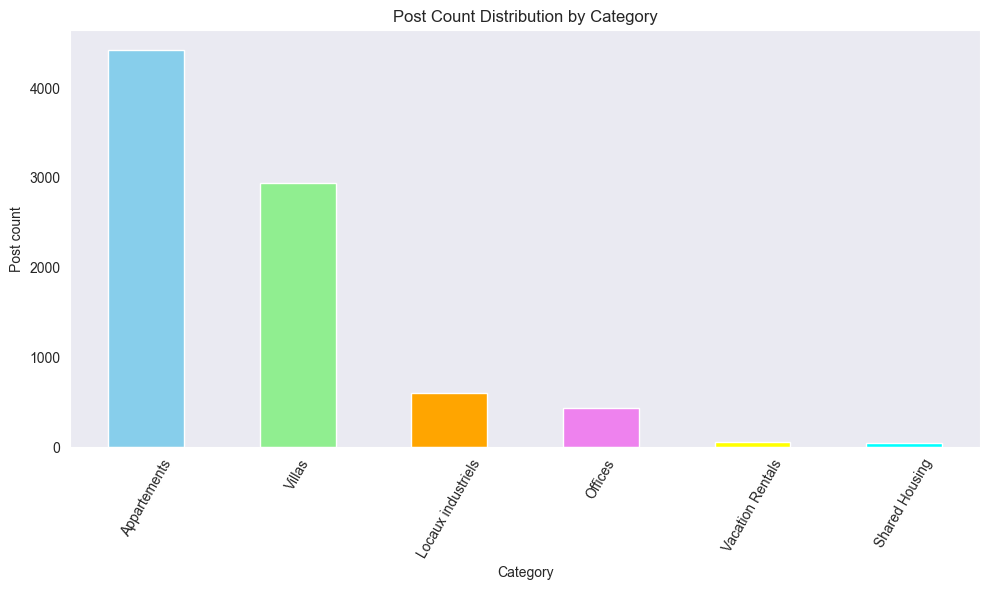

In [380]:
colors=["skyblue", "lightgreen", "orange","violet","yellow","cyan","red"]

plt.figure(figsize=(10, 6))
df.category.value_counts().plot(kind="bar", y="count", width=0.5, color=colors)
plt.xlabel("Category")
plt.ylabel("Post count")
plt.xticks(rotation=60)
plt.title("Post Count Distribution by Category")
plt.tight_layout()
plt.show()

<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Inferences:</h4>

<p>This is the result of post counts distributed across various property categories.</p>

<p>This is our target variable for analysis. Looking at the histogram, we see that the category <b>Apartments</b> has the highest post count, nearing 4000, while <b>Shared Housing</b> and <b>Vacation Rentals</b> have the lowest, each below 500. Platforms or businesses focusing on high-demand categories like Apartments can likely increase user engagement and listings. Meanwhile, exploring strategies to boost interest in less popular categories like Shared Housing could tap into new market opportunities, potentially increasing overall platform activity and diversity in offerings.</p>

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Cities with the most real estate sale posts </h1>


C:\Users\naim\AppData\Local\Temp\ipykernel_1912\3036989895.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


[Text(0, 0, 'Ariana'),
 Text(1, 0, 'Ben arous'),
 Text(2, 0, 'Bizerte'),
 Text(3, 0, 'Béja'),
 Text(4, 0, 'Gabès'),
 Text(5, 0, 'Gafsa'),
 Text(6, 0, 'Jendouba'),
 Text(7, 0, 'Kairouan'),
 Text(8, 0, 'Kasserine'),
 Text(9, 0, 'Kébili'),
 Text(10, 0, 'La manouba'),
 Text(11, 0, 'Le kef'),
 Text(12, 0, 'Mahdia'),
 Text(13, 0, 'Monastir'),
 Text(14, 0, 'Médenine'),
 Text(15, 0, 'Nabeul'),
 Text(16, 0, 'Sfax'),
 Text(17, 0, 'Sidi bouzid'),
 Text(18, 0, 'Siliana'),
 Text(19, 0, 'Sousse'),
 Text(20, 0, 'Tataouine'),
 Text(21, 0, 'Tozeur'),
 Text(22, 0, 'Tunis'),
 Text(23, 0, 'Zaghouan')]

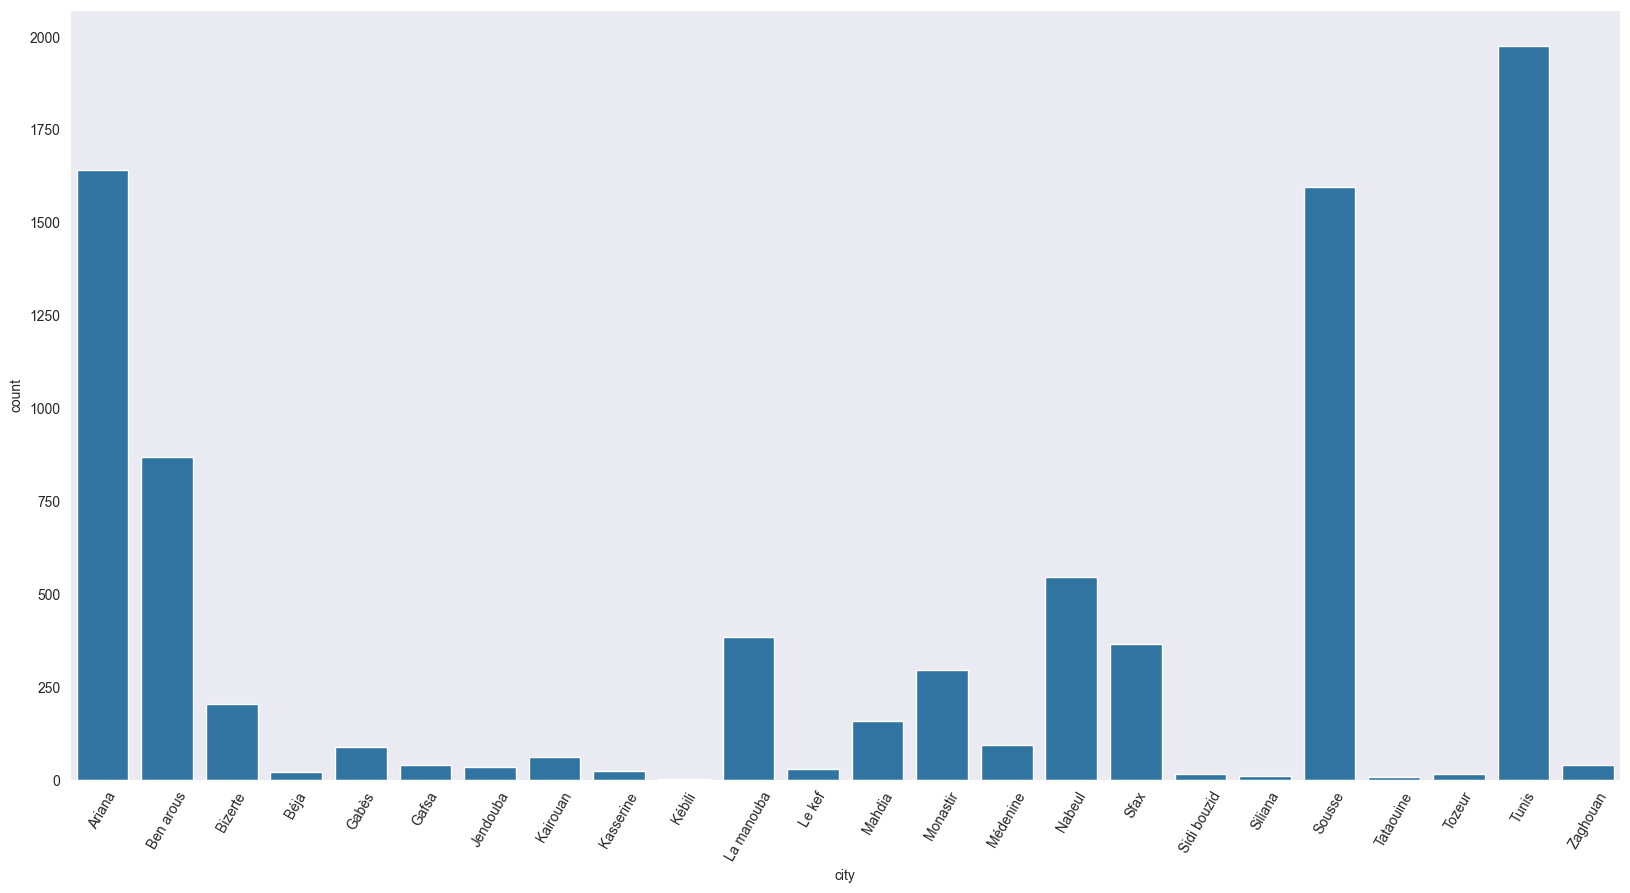

In [381]:
fig, ax = plt.subplots(figsize=(20, 10)) 

sns.countplot(df, x="city",ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Inferences:</h4>

<p>This is the result of post counts distributed across various cities, with a focus on Tunis and Zaghouan.</p>

<p>This is our target variable for analysis. Looking at the histogram, we see that the city <b>Tunis</b> has the highest post count, exceeding 1750, while cities like <b>Kairouan</b> and <b>Jendouba</b> have the lowest, with counts near 0. This indicates that Tunis is likely a major hub for activity in this dataset, possibly due to its larger population or economic significance. Cities with higher post counts, such as Tunis and Zaghouan, may benefit from targeted marketing or platform enhancements to further boost engagement, while lower-activity cities like Kairouan could be explored for growth opportunities to balance regional activity.</p>

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Distribution of "For Sale" and "For Rent" posts per city </h1>


In [382]:
df['city'][df.type == "À Louer"].unique()

['Ariana', 'Béja', 'Ben arous', 'Bizerte', 'Gabès', ..., 'Tozeur', 'Zaghouan', 'Sfax', 'Nabeul', 'Tunis']
Length: 23
Categories (24, object): ['Ariana', 'Ben arous', 'Bizerte', 'Béja', ..., 'Tataouine', 'Tozeur', 'Tunis', 'Zaghouan']

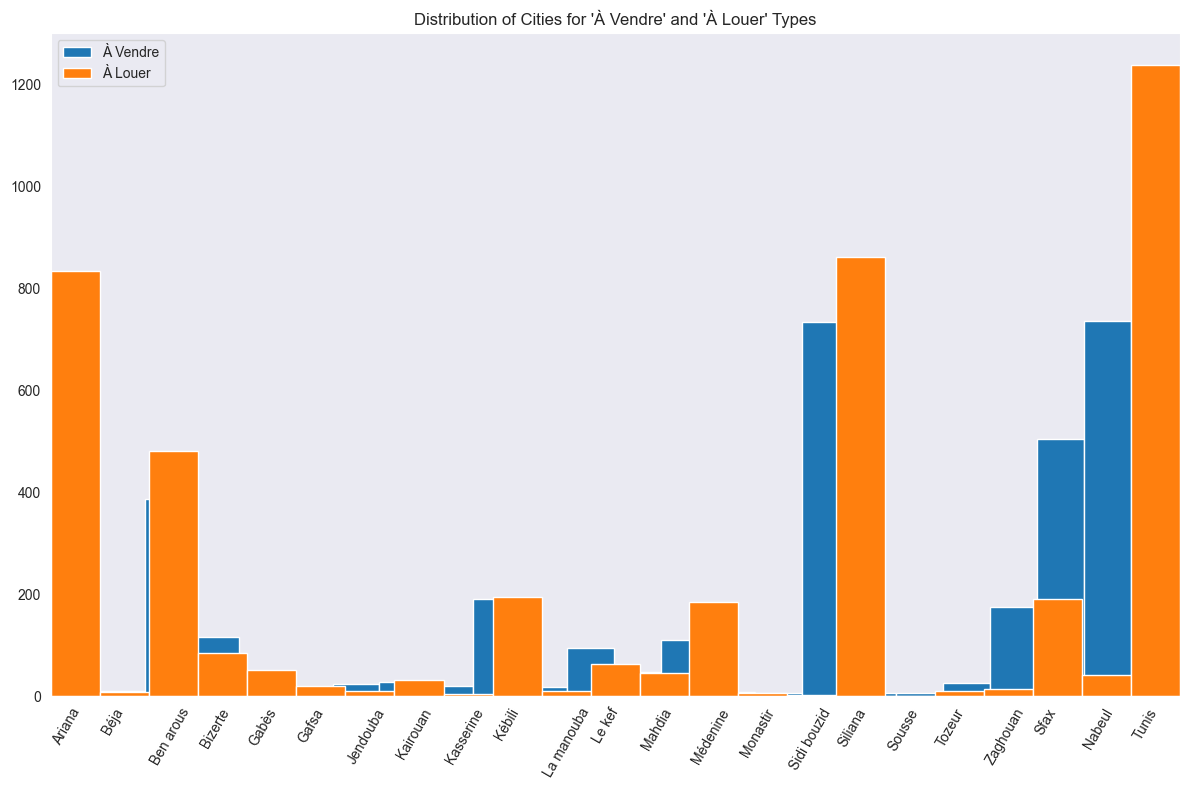

In [383]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Define city names as tick labels
city_names = df['city'][df.type == "À Louer"].unique()

# Create figure and axes
fig, axs = plt.subplots(figsize=(12, 8))

# Generate histograms with labels
axs.hist(df['city'][df.type == "À Vendre"], bins=23, label="À Vendre")
axs.hist(df['city'][df.type == "À Louer"], bins=23, label="À Louer")

# Set fixed tick locations and labels with rotation
axs.set_xlim(0,len(city_names))
xticks = range(len(city_names))
locator = FixedLocator(xticks)
axs.xaxis.set_major_locator(locator)
axs.set_xticklabels(city_names, rotation=90)

# Add legend and title
axs.legend()
axs.set_title("Distribution of Cities for 'À Vendre' and 'À Louer' Types")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60,ha='left')

plt.tight_layout()
plt.show()


<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Inferences:</h4>

<p>This is the result of post counts for properties listed as <b>À Vendre</b> (For Sale) and <b>À Louer</b> (For Rent) across various locations.</p>

<p>This is our target variable for analysis. Looking at the bar chart, we see that <b>Tunis</b> has the highest post count, exceeding 1200 for À Louer, indicating a strong rental market, while <b>Ariana</b> also shows a high count of around 800 for À Louer. Cities like <b>Sousse</b> and <b>Zaghouan</b> have significant activity for both categories, with À Louer slightly outpacing À Vendre. This suggests a robust rental demand in urban areas like Tunis and Ariana, potentially driven by population density or economic factors, while lower counts in cities like <b>Jendouba</b> and <b>Siliana</b> may indicate untapped markets for property listings, offering opportunities for growth in both sales and rentals.</p>

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Cities with most real estate posts, sorted </h1>


In [384]:
# Resizing dataset
df_app = df.filter(['category','price','size','type'], axis=1)
print(df_app)

                 category     price   size      type
2            Appartements     380.0   80.0   À Louer
4            Appartements  170000.0  113.0  À Vendre
6            Appartements     670.0  100.0   À Louer
7      Locaux industriels     650.0   20.0   À Louer
9      Locaux industriels     450.0   40.0   À Louer
...                   ...       ...    ...       ...
12740        Appartements  110000.0   68.0  À Vendre
12741        Appartements  250000.0  140.0  À Vendre
12744        Appartements     600.0  100.0   À Louer
12746              Villas  240000.0  190.0  À Vendre
12747              Villas     500.0   70.0   À Louer

[8508 rows x 4 columns]


C:\Users\naim\AppData\Local\Temp\ipykernel_1912\2288861429.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


[Text(0, 0, 'Tunis'),
 Text(1, 0, 'Ariana'),
 Text(2, 0, 'Sousse'),
 Text(3, 0, 'Ben arous'),
 Text(4, 0, 'Nabeul'),
 Text(5, 0, 'La manouba'),
 Text(6, 0, 'Sfax'),
 Text(7, 0, 'Monastir'),
 Text(8, 0, 'Bizerte'),
 Text(9, 0, 'Mahdia'),
 Text(10, 0, 'Médenine'),
 Text(11, 0, 'Gabès'),
 Text(12, 0, 'Kairouan'),
 Text(13, 0, 'Zaghouan'),
 Text(14, 0, 'Gafsa'),
 Text(15, 0, 'Jendouba'),
 Text(16, 0, 'Le kef'),
 Text(17, 0, 'Kasserine'),
 Text(18, 0, 'Béja'),
 Text(19, 0, 'Tozeur'),
 Text(20, 0, 'Sidi bouzid'),
 Text(21, 0, 'Siliana'),
 Text(22, 0, 'Tataouine'),
 Text(23, 0, 'Kébili')]

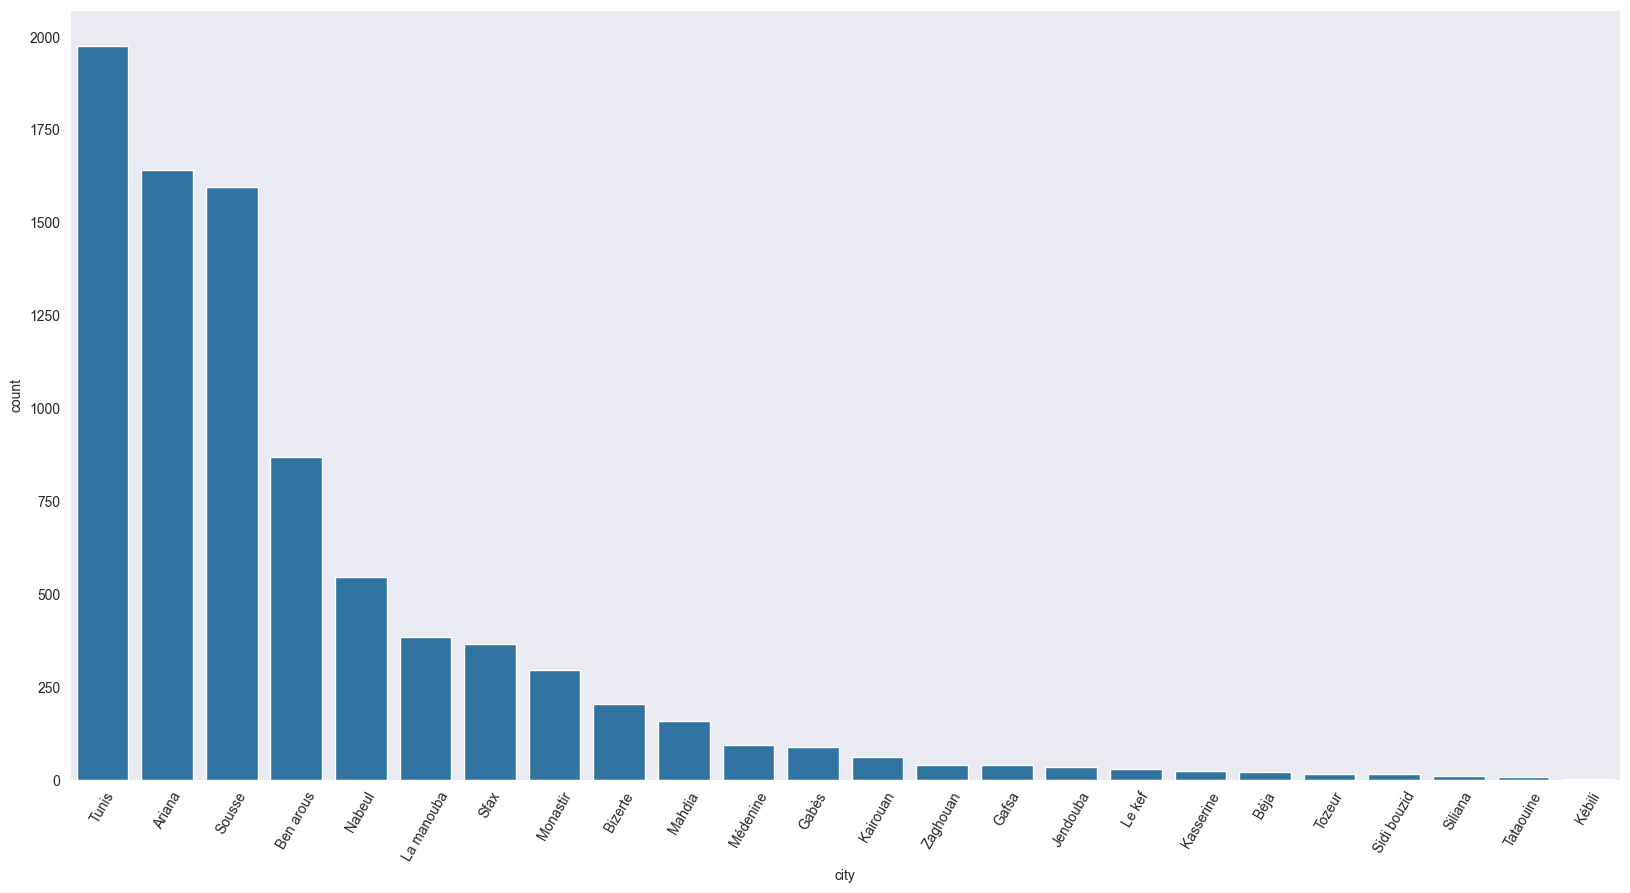

In [385]:
fig, ax = plt.subplots(figsize=(20, 10)) 

sns.countplot(df, x="city",ax=ax,order=df.city.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)


<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Inferences:</h4>

<p>This is the result of post counts distributed across various locations, with a focus on Kébili.</p>

<p>This is our target variable for analysis. Looking at the histogram, we see that <b>Tunis</b> has the highest post count, exceeding 2000, indicating it is a major center of activity in this dataset. <b>Ariana</b> follows with a count around 1600, suggesting another significant hub. Locations like <b>Kébili</b>, <b>Siliana</b>, and <b>Tataouine</b> have the lowest counts, near 0, which may reflect lower population density or activity. This distribution suggests that urban centers like Tunis and Ariana could be prioritized for targeted platform enhancements, while exploring ways to increase engagement in less active regions like Kébili could help balance and expand overall activity.</p>

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Size vs. Price of real estate posts visualized </h1>

We can spot a few outliers too

**Why use the logarithm of price ?**

It helps to visualize overall trends and relationships more clearly, especially when comparing prices across different ranges or property types.



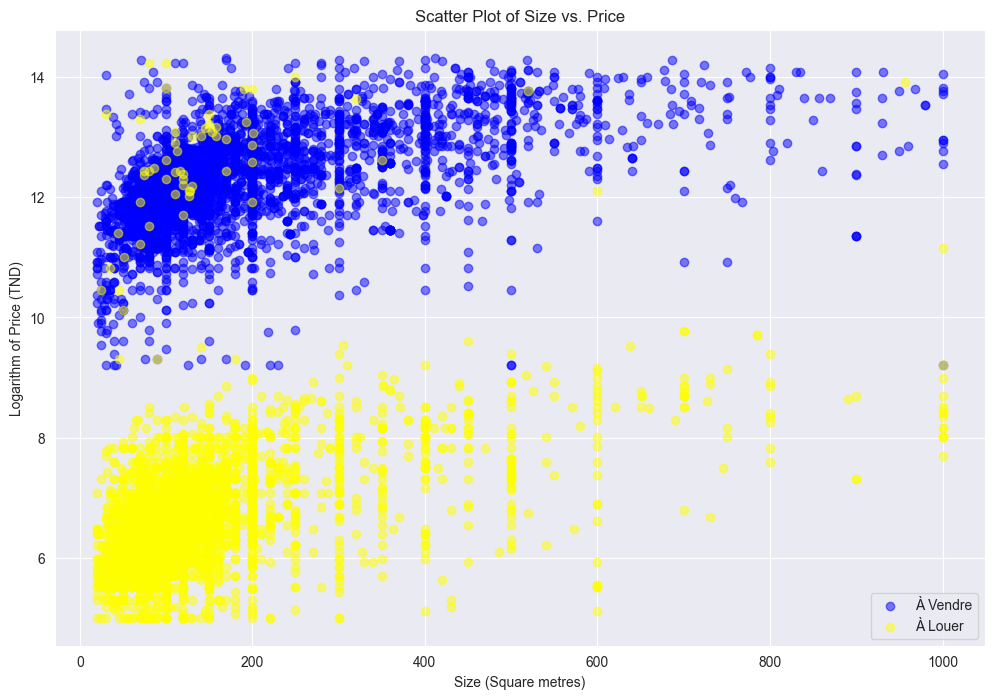

In [386]:
# Creating a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

plt.scatter(
    df_app["size"][df_app.type == "À Vendre"],
    [np.log(price) for price in df_app["price"][df_app.type == "À Vendre"]],
    alpha=0.5,
    color="blue",
    label="À Vendre",
)
plt.scatter(
    df_app["size"][df_app.type == "À Louer"],
    [np.log(price) for price in df_app["price"][df_app.type == "À Louer"]],
    alpha=0.5,
    color="yellow",
    label="À Louer",
)
# Adding labels and title
plt.xlabel("Size (Square metres)")
plt.ylabel("Logarithm of Price (TND)") # Log was used to help focus on changes
plt.title("Scatter Plot of Size vs. Price")
plt.legend()

plt.grid(True)  # Adding grid lines
plt.show()

<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Inferences:</h4>

<p>This is the result of property price distribution for listings marked as <b>À Vendre</b> (For Sale) and <b>À Louer</b> (For Rent).</p>

<p>This is our target variable for analysis. Looking at the scatter plot, we see that properties listed as <b>À Louer</b> (yellow) are densely clustered at lower price points, mostly below a log price of 8 (approximately 3000 TND), while <b>À Vendre</b> (blue) listings are more spread out, with many exceeding a log price of 10 (approximately 22000 TND). This suggests that rental properties tend to be more affordable and uniform in price, likely catering to a broader market, whereas properties for sale exhibit a wider price range, indicating a diverse market with both budget and premium options. Platforms could leverage this by promoting affordable rentals to attract tenants, while highlighting the variety in sales listings to appeal to diverse buyers.</p>

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Data Preparation </h1>


In [387]:
# Séparer X et y
X = df.drop(columns=['price'])
y = df['price']

# Colonnes à encoder et à normaliser
categorical_cols = ['category', 'type', 'city', 'region']
numeric_cols = ['room_count', 'bathroom_count', 'size']



--- Évaluation du modèle ---
RMSE : 125,566.75 TND
R²   : 0.723


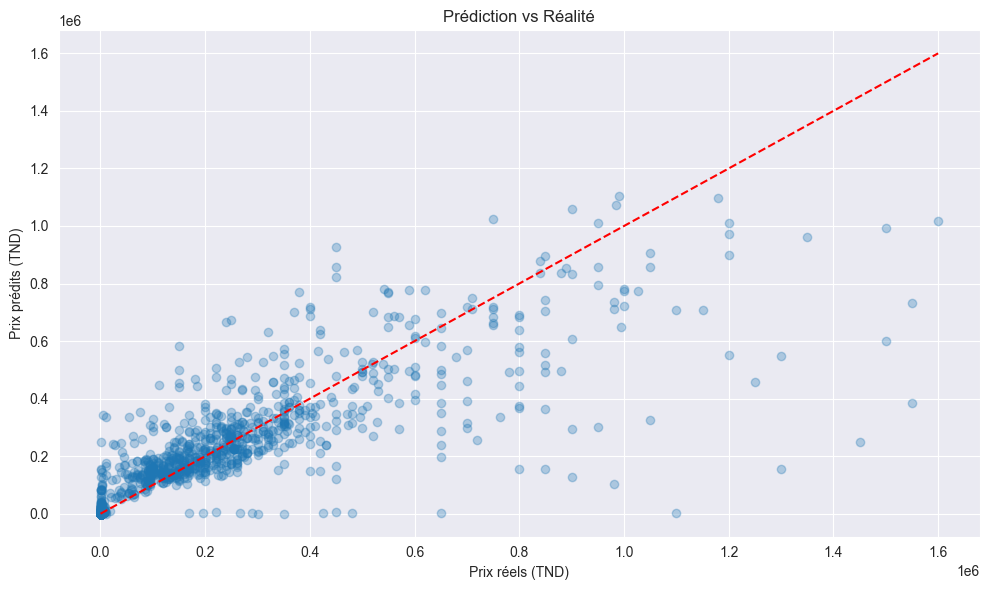

In [388]:
# Préprocesseur : pipeline de nettoyage
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ]), numeric_cols),
    
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# Pipeline complet
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entraînement du modèle
model_pipeline.fit(X_train, y_train)

# Prédictions
y_pred = model_pipeline.predict(X_test)

# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Évaluation du modèle ---")
print(f"RMSE : {rmse:,.2f} TND")
print(f"R²   : {r2:.3f}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Prix réels (TND)")
plt.ylabel("Prix prédits (TND)")
plt.title("Prédiction vs Réalité")
plt.grid(True)
plt.tight_layout()
plt.show()

<h4 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Inferences:</h4>

<p>This is the result of comparing predicted property prices against actual prices after training the model.</p>

<p>This is our target variable for analysis. Looking at the scatter plot, we see that the predicted prices (y-axis) closely align with the actual prices (x-axis) along the red dashed line, indicating good model performance. The R² value of 0.723 suggests that 72.3% of the variance in actual prices is explained by the model, which is a strong fit. However, the RMSE of 125,566.75 TND indicates that predictions can deviate significantly from actual values, especially for higher-priced properties where the scatter widens. This model can be useful for estimating property prices, but for high-value properties, additional features or model tuning may be needed to reduce prediction errors and improve accuracy.</p>

In [389]:
# Sauvegarder le modèle dans un fichier
joblib.dump(model_pipeline, 'property_price_model.pkl')
print("Modèle sauvegardé dans 'property_price_model.pkl'")

Modèle sauvegardé dans 'property_price_model.pkl'


<h3 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">Conclusion:</h3>

<p><b>Synthèse des résultats:</b> The analysis of the property listings dataset reveals clear trends across categories, locations, and pricing. The first graph shows that apartments dominate listings with nearly 4000 posts, indicating high demand, while categories like shared housing are underrepresented (below 500 posts). The second and fourth graphs highlight that Tunis and Ariana are key activity hubs, with Tunis consistently exceeding 1750-2000 posts, reflecting their urban significance. The third graph underscores a stronger rental market in these cities, with Tunis showing over 1200 rental listings compared to sales. The fifth graph illustrates that rental properties are more affordable (mostly below 3000 TND), while sales listings span a wider price range (up to 22000 TND), catering to diverse buyers. Finally, the sixth graph evaluates a predictive model, achieving a solid R² of 0.723 but with an RMSE of 125,566.75 TND, indicating room for improvement in predicting high-value properties.</p>

<p><b>Exploitations et extensions possibles:</b> These insights can guide targeted strategies for property platforms. High-demand areas like Tunis and Ariana, and categories like apartments, should be prioritized for marketing and platform enhancements to maximize engagement. The rental market's affordability suggests potential for attracting a broader tenant base, while the diverse pricing in sales listings can appeal to varied buyer segments—strategies like personalized recommendations could enhance user experience. For underrepresented areas (e.g., Kébili, Siliana) and categories (e.g., shared housing), incentives or campaigns could stimulate activity, balancing regional and category engagement. The predictive model, while effective, needs refinement for high-value properties; incorporating additional features (e.g., property size, amenities) or advanced techniques (e.g., ensemble methods) could reduce errors, enhancing its utility for pricing decisions. Expanding the dataset to include more regions and property types could further improve model accuracy and market coverage.</p>